In [86]:
#importar librerías
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [87]:
# Leer archivos con la información
secciones = gpd.read_file("../data/SHAPEFILE/SECCION.shp")
municipios = gpd.read_file("../data/mg_2023_integrado/conjunto_de_datos/00mun.shp")
idm = pd.read_csv('../data/IDM_ago2024.csv')

print("Columnas secciones")
print(secciones.columns)

print("\n")
print("Columnas IDM")
print(idm.columns)


Columnas secciones
Index(['ID', 'ENTIDAD', 'DISTRITO_F', 'DISTRITO_L', 'MUNICIPIO', 'SECCION',
       'TIPO', 'CONTROL', 'GEOMETRY1_', 'geometry'],
      dtype='object')


Columnas IDM
Index(['AÑO', 'INEGI', 'ENTIDAD', 'MUNICIPIO', 'MODALIDAD', 'TIPO', 'SUBTIPO',
       'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype='object')


In [88]:
# COnvertimos los id's de municipios y entidades en integers
print(municipios.columns)
municipios['CVE_MUN'] = municipios['CVE_MUN'].astype(int)
municipios['CVE_ENT'] = municipios['CVE_ENT'].astype(int)
municipios

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'geometry'], dtype='object')


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01008,1,8,San José de Gracia,"POLYGON ((2453326.553 1143576.423, 2453363.324..."
1,01009,1,9,Tepezalá,"POLYGON ((2481826.447 1149055.253, 2481589.222..."
2,01007,1,7,Rincón de Romos,"POLYGON ((2476760.231 1150329.045, 2476783.634..."
3,01006,1,6,Pabellón de Arteaga,"POLYGON ((2473996.656 1129304.114, 2474217.81 ..."
4,01005,1,5,Jesús María,"POLYGON ((2463657.764 1116053.82, 2463738.92 1..."
...,...,...,...,...,...
2470,32029,32,29,Miguel Auza,"POLYGON ((2355465.893 1369546.77, 2355543.843 ..."
2471,32028,32,28,Mezquital del Oro,"POLYGON ((2367118.716 1037654.815, 2367134.749..."
2472,32011,32,11,Trinidad García de la Cadena,"POLYGON ((2351804.877 1035949.877, 2351842.489..."
2473,32027,32,27,Melchor Ocampo,"POLYGON ((2470352.986 1453426.983, 2473254.843..."


In [89]:
# Renombramos las columnas
idm = idm.rename(columns = {"TIPO" : "TIPO_CRIMEM", "SUBTIPO": "SUBTIPO_CRIMEN", "ENTIDAD" : "NOM_ENTDIAD", "MUNICIPIO" : "NOM_MUNICIPIO"})

In [90]:
idm.head()

,AÑO,INEGI,NOM_ENTDIAD,NOM_MUNICIPIO,MODALIDAD,TIPO_CRIMEM,SUBTIPO_CRIMEN,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,2011,1001,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,45.0,43.0,34.0,22.0,36.0,43.0,37.0,38.0,37.0,35.0,32.0,28.0
1,2011,1001,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,DAÑO EN PROPIEDAD AJENA,DAÑO EN PROPIEDAD AJENA,164.0,177.0,160.0,179.0,167.0,149.0,150.0,144.0,171.0,144.0,134.0,173.0
2,2011,1001,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,EXTORSION,EXTORSION,10.0,24.0,9.0,7.0,8.0,9.0,9.0,1.0,7.0,6.0,4.0,5.0
3,2011,1001,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,FRAUDE,FRAUDE,54.0,29.0,37.0,37.0,53.0,37.0,44.0,36.0,27.0,20.0,38.0,32.0
4,2011,1001,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Sacamos el ID de cada entidad y municipio 
idm["ID_ENTIDAD"] = np.floor((idm["INEGI"] / 1000)).astype("int")
idm["ID_MUNICIPIO"] = idm["INEGI"] % 1000

In [92]:
# Filtramos delitos para obtener sólo "ROBO COMÚN" en "NEGOCIO"
idm = idm[idm["MODALIDAD"] == "ROBO COMUN"]
idm = idm[idm["SUBTIPO_CRIMEN"] == "A NEGOCIO"]

In [143]:
# Quitamos Tipo de crimen (nos interesa con y sin violencia)
idm = idm.drop("TIPO_CRIMEM", axis = 1)

KeyError: "['TIPO_CRIMEM'] not found in axis"

In [95]:
# Total de robos por año
months = ["ENERO", "FEBRERO", "MARZO", "ABRIL", "MAYO", "JUNIO", "JULIO", "AGOSTO", "SEPTIEMBRE", "OCTUBRE", "NOVIEMBRE", "DICIEMBRE"]
idm["TOTAL_ROBOS_AÑO"] = idm[months].sum(axis = 1)


In [96]:
idm

,AÑO,INEGI,NOM_ENTDIAD,NOM_MUNICIPIO,MODALIDAD,SUBTIPO_CRIMEN,ENERO,FEBRERO,MARZO,ABRIL,...,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,ID_ENTIDAD,ID_MUNICIPIO,TOTAL_ROBOS_AÑO
30,2011,1001,AGUASCALIENTES,AGUASCALIENTES,ROBO COMUN,A NEGOCIO,15.0,11.0,7.0,9.0,...,13.0,9.0,10.0,14.0,23.0,16.0,32.0,1,1,169.0
37,2011,1001,AGUASCALIENTES,AGUASCALIENTES,ROBO COMUN,A NEGOCIO,85.0,67.0,79.0,75.0,...,92.0,70.0,97.0,77.0,58.0,97.0,55.0,1,1,935.0
96,2011,1002,AGUASCALIENTES,ASIENTOS,ROBO COMUN,A NEGOCIO,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.0
103,2011,1002,AGUASCALIENTES,ASIENTOS,ROBO COMUN,A NEGOCIO,3.0,1.0,1.0,6.0,...,2.0,0.0,4.0,1.0,1.0,1.0,1.0,1,2,26.0
162,2011,1003,AGUASCALIENTES,CALVILLO,ROBO COMUN,A NEGOCIO,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853586,2017,32056,ZACATECAS,ZACATECAS,ROBO COMUN,A NEGOCIO,3.0,3.0,3.0,4.0,...,4.0,0.0,2.0,5.0,6.0,2.0,3.0,32,56,37.0
853645,2017,32057,ZACATECAS,TRANCOSO,ROBO COMUN,A NEGOCIO,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,57,0.0
853652,2017,32057,ZACATECAS,TRANCOSO,ROBO COMUN,A NEGOCIO,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,57,1.0
853711,2017,32058,ZACATECAS,SANTA MARIA DE LA PAZ,ROBO COMUN,A NEGOCIO,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,58,0.0


In [98]:
idm.columns

Index(['AÑO', 'INEGI', 'NOM_ENTDIAD', 'NOM_MUNICIPIO', 'MODALIDAD',
       'SUBTIPO_CRIMEN', 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
       'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE',
       'ID_ENTIDAD', 'ID_MUNICIPIO', 'TOTAL_ROBOS_AÑO'],
      dtype='object')

In [125]:
columnas_groupby = ['AÑO', 'INEGI', 'NOM_ENTDIAD', 'NOM_MUNICIPIO', 'MODALIDAD',
       'SUBTIPO_CRIMEN', 'ID_ENTIDAD', 'ID_MUNICIPIO']

total_robo_comun = idm.groupby(columnas_groupby).sum("TOTAL_ROBOS_AÑO").reset_index()

In [126]:
# Obtenemos datos para el año más reciente 
total_robo_comun_2017 = total_robo_comun[total_robo_comun["AÑO"] == 2017]

,AÑO,INEGI,NOM_ENTDIAD,NOM_MUNICIPIO,MODALIDAD,SUBTIPO_CRIMEN,ID_ENTIDAD,ID_MUNICIPIO,ENERO,FEBRERO,...,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_ROBOS_AÑO
10482,2017,2001,BAJA CALIFORNIA,ENSENADA,ROBO COMUN,A NEGOCIO,2,1,97.0,67.0,...,47.0,51.0,49.0,54.0,44.0,59.0,38.0,48.0,36.0,637.0
10483,2017,2002,BAJA CALIFORNIA,MEXICALI,ROBO COMUN,A NEGOCIO,2,2,373.0,374.0,...,296.0,289.0,210.0,211.0,175.0,237.0,223.0,247.0,255.0,3325.0
10484,2017,2003,BAJA CALIFORNIA,TECATE,ROBO COMUN,A NEGOCIO,2,3,36.0,18.0,...,19.0,22.0,20.0,16.0,22.0,21.0,8.0,22.0,17.0,232.0
10485,2017,2004,BAJA CALIFORNIA,TIJUANA,ROBO COMUN,A NEGOCIO,2,4,341.0,305.0,...,309.0,338.0,288.0,296.0,384.0,316.0,302.0,351.0,322.0,3888.0
10486,2017,2005,BAJA CALIFORNIA,PLAYAS DE ROSARITO,ROBO COMUN,A NEGOCIO,2,5,18.0,10.0,...,16.0,13.0,10.0,9.0,10.0,22.0,16.0,13.0,8.0,157.0


In [127]:
# Añadimos los dos municipios de Baja California donde no hay datos con ceros

total_robo_comun_2017.loc[len(total_robo_comun_2017)] = [2017, 2006, "BAJA CALIFORNIA", "MUNICIPIO 6", "ROBO COMUN", "A NEGOCIO", 2, 6, 0,0,0,0,0,0,0,0,0,0,0,0,0]
total_robo_comun_2017[total_robo_comun_2017["NOM_ENTDIAD"] == "BAJA CALIFORNIA"]

/var/folders/50/940l31y52cb7fcj9qlg7s11m0000gn/T/ipykernel_76814/2172117134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_robo_comun_2017.loc[len(total_robo_comun_2017)] = [2017, 2006, "BAJA CALIFORNIA", "MUNICIPIO 6", "ROBO COMUN", "A NEGOCIO", 2, 6, 0,0,0,0,0,0,0,0,0,0,0,0,0]


,AÑO,INEGI,NOM_ENTDIAD,NOM_MUNICIPIO,MODALIDAD,SUBTIPO_CRIMEN,ID_ENTIDAD,ID_MUNICIPIO,ENERO,FEBRERO,...,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_ROBOS_AÑO
10482,2017,2001,BAJA CALIFORNIA,ENSENADA,ROBO COMUN,A NEGOCIO,2,1,97.0,67.0,...,47.0,51.0,49.0,54.0,44.0,59.0,38.0,48.0,36.0,637.0
10483,2017,2002,BAJA CALIFORNIA,MEXICALI,ROBO COMUN,A NEGOCIO,2,2,373.0,374.0,...,296.0,289.0,210.0,211.0,175.0,237.0,223.0,247.0,255.0,3325.0
10484,2017,2003,BAJA CALIFORNIA,TECATE,ROBO COMUN,A NEGOCIO,2,3,36.0,18.0,...,19.0,22.0,20.0,16.0,22.0,21.0,8.0,22.0,17.0,232.0
10485,2017,2004,BAJA CALIFORNIA,TIJUANA,ROBO COMUN,A NEGOCIO,2,4,341.0,305.0,...,309.0,338.0,288.0,296.0,384.0,316.0,302.0,351.0,322.0,3888.0
10486,2017,2005,BAJA CALIFORNIA,PLAYAS DE ROSARITO,ROBO COMUN,A NEGOCIO,2,5,18.0,10.0,...,16.0,13.0,10.0,9.0,10.0,22.0,16.0,13.0,8.0,157.0
2465,2017,2006,BAJA CALIFORNIA,MUNICIPIO 6,ROBO COMUN,A NEGOCIO,2,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
total_robo_comun_2017.loc[len(total_robo_comun_2017)] = [2017, 2006, "BAJA CALIFORNIA", "MUNICIPIO 7", "ROBO COMUN", "A NEGOCIO", 2, 7, 0,0,0,0,0,0,0,0,0,0,0,0,0]
total_robo_comun_2017[total_robo_comun_2017["NOM_ENTDIAD"] == "BAJA CALIFORNIA"]

/var/folders/50/940l31y52cb7fcj9qlg7s11m0000gn/T/ipykernel_76814/1758553220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_robo_comun_2017.loc[len(total_robo_comun_2017)] = [2017, 2006, "BAJA CALIFORNIA", "MUNICIPIO 7", "ROBO COMUN", "A NEGOCIO", 2, 7, 0,0,0,0,0,0,0,0,0,0,0,0,0]


,AÑO,INEGI,NOM_ENTDIAD,NOM_MUNICIPIO,MODALIDAD,SUBTIPO_CRIMEN,ID_ENTIDAD,ID_MUNICIPIO,ENERO,FEBRERO,...,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_ROBOS_AÑO
10482,2017,2001,BAJA CALIFORNIA,ENSENADA,ROBO COMUN,A NEGOCIO,2,1,97.0,67.0,...,47.0,51.0,49.0,54.0,44.0,59.0,38.0,48.0,36.0,637.0
10483,2017,2002,BAJA CALIFORNIA,MEXICALI,ROBO COMUN,A NEGOCIO,2,2,373.0,374.0,...,296.0,289.0,210.0,211.0,175.0,237.0,223.0,247.0,255.0,3325.0
10484,2017,2003,BAJA CALIFORNIA,TECATE,ROBO COMUN,A NEGOCIO,2,3,36.0,18.0,...,19.0,22.0,20.0,16.0,22.0,21.0,8.0,22.0,17.0,232.0
10485,2017,2004,BAJA CALIFORNIA,TIJUANA,ROBO COMUN,A NEGOCIO,2,4,341.0,305.0,...,309.0,338.0,288.0,296.0,384.0,316.0,302.0,351.0,322.0,3888.0
10486,2017,2005,BAJA CALIFORNIA,PLAYAS DE ROSARITO,ROBO COMUN,A NEGOCIO,2,5,18.0,10.0,...,16.0,13.0,10.0,9.0,10.0,22.0,16.0,13.0,8.0,157.0
2465,2017,2006,BAJA CALIFORNIA,MUNICIPIO 6,ROBO COMUN,A NEGOCIO,2,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2466,2017,2006,BAJA CALIFORNIA,MUNICIPIO 7,ROBO COMUN,A NEGOCIO,2,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# Merge con la tabla que tiene los polígonos 

total_robo_comun_merge_municipios = total_robo_comun_2017.merge(municipios, left_on=["ID_ENTIDAD", "ID_MUNICIPIO"], right_on = ['CVE_ENT', 'CVE_MUN'])



In [131]:
# Convertimos en GeoDataFrame
total_robo_comun_merge_municipios = gpd.GeoDataFrame(total_robo_comun_merge_municipios, geometry="geometry")


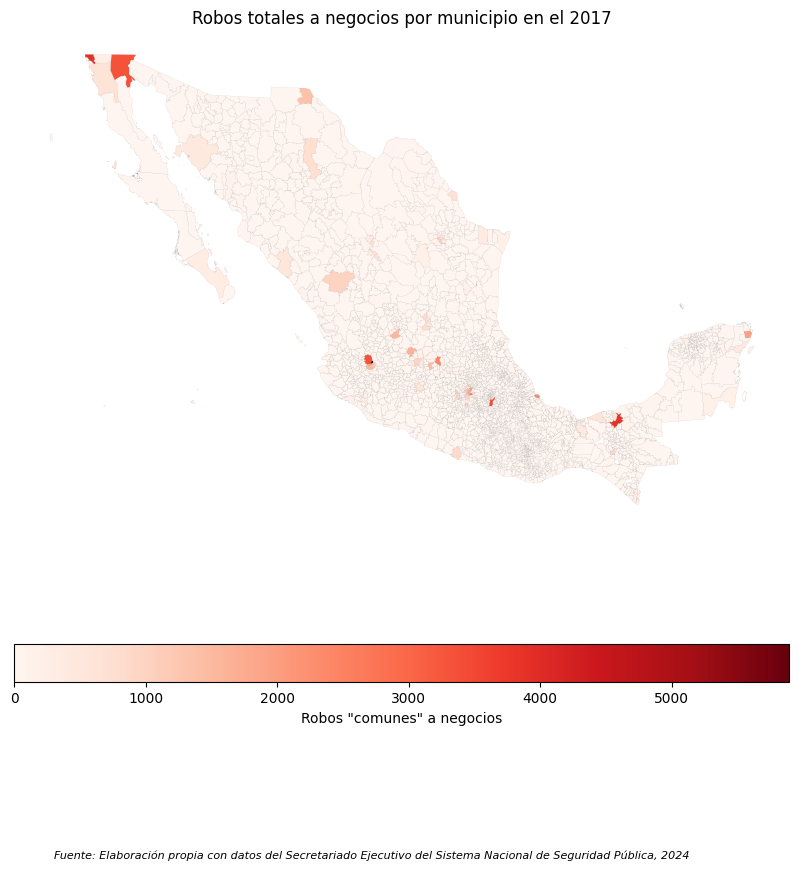

In [149]:
fig, ax = plt.subplots(figsize=(10, 10))
total_robo_comun_merge_municipios.plot(column='TOTAL_ROBOS_AÑO', cmap='Reds', legend=True, 
                     ax=ax, linewidth=0.05, edgecolor = "grey", legend_kwds={'label': 'Robos "comunes" a negocios', 'orientation': 'horizontal'})
ax.set_axis_off()
plt.title("Robos totales a negocios por municipio en el 2017")
plt.figtext(0.80, 0.01, "Fuente: Elaboración propia con datos del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública, 2024", 
            ha="right", fontsize=8, style='italic')
plt.show()